# Board Game Rating Prediction

## Project Objective
The goal of this project is to predict the **average rating** of board games using features such as number of users rated, playing time, minimum/maximum players, and complexity. This can be used to assist in building **game recommendation systems** and inform **marketing or inventory decisions** for publishers or platforms like BoardGameGeek.


In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
games = pd.read_csv("board_games.csv")
games

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81307,184441,boardgameexpansion,Micro Rome: Aegyptus,2015.0,1.0,1.0,0.0,30.0,0.0,10.0,0,0.00000,0.00000,0,0,0,0,0,0,0.0000
81308,184442,boardgame,Trivial Pursuit: Marvel Cinematic Universe Da...,2013.0,2.0,0.0,0.0,0.0,0.0,12.0,0,0.00000,0.00000,0,0,0,0,0,0,0.0000
81309,184443,boardgame,BEARanoia,2015.0,2.0,15.0,1.0,1.0,1.0,0.0,0,0.00000,0.00000,0,0,0,0,0,0,0.0000
81310,184449,boardgame,Freight,2015.0,2.0,4.0,60.0,30.0,60.0,8.0,0,0.00000,0.00000,0,0,0,0,0,0,0.0000


In [3]:
games.head()

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943


In [4]:
games.tail()

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
81307,184441,boardgameexpansion,Micro Rome: Aegyptus,2015.0,1.0,1.0,0.0,30.0,0.0,10.0,0,0.0,0.0,0,0,0,0,0,0,0.0
81308,184442,boardgame,Trivial Pursuit: Marvel Cinematic Universe Da...,2013.0,2.0,0.0,0.0,0.0,0.0,12.0,0,0.0,0.0,0,0,0,0,0,0,0.0
81309,184443,boardgame,BEARanoia,2015.0,2.0,15.0,1.0,1.0,1.0,0.0,0,0.0,0.0,0,0,0,0,0,0,0.0
81310,184449,boardgame,Freight,2015.0,2.0,4.0,60.0,30.0,60.0,8.0,0,0.0,0.0,0,0,0,0,0,0,0.0
81311,184451,boardgame,Bingo Animal Kids,2010.0,1.0,6.0,10.0,10.0,10.0,2.0,0,0.0,0.0,0,0,0,0,0,0,0.0


In [5]:
games.describe()

,id,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
count,81312.000000,81309.000000,81309.000000,81309.000000,81309.000000,81309.000000,81309.000000,81309.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000
mean,72278.150138,1806.630668,1.992018,5.637703,51.634788,49.276833,51.634788,6.983975,161.886585,4.212144,1.157632,262.502509,9.236423,12.688890,42.719144,49.290031,16.488009,0.908083
std,58818.237742,588.517834,0.931034,56.076890,345.699969,334.483934,345.699969,5.035138,1145.978126,3.056551,2.340033,1504.536693,39.757408,60.764207,239.292628,284.862853,115.980285,1.176002
min,1.000000,-3500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21339.750000,1984.000000,2.000000,2.000000,8.000000,10.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,43258.000000,2003.000000,2.000000,4.000000,30.000000,30.000000,30.000000,8.000000,2.000000,5.265620,0.000000,7.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,128836.500000,2010.000000,2.000000,6.000000,60.000000,60.000000,60.000000,12.000000,16.000000,6.718777,0.000000,51.000000,2.000000,3.000000,7.000000,9.000000,2.000000,1.916700
max,184451.000000,2018.000000,99.000000,11299.000000,60120.000000,60120.000000,60120.000000,120.000000,53680.000000,10.000000,8.221860,73188.000000,1395.000000,1586.000000,6402.000000,11798.000000,5996.000000,5.000000


In [6]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81312 entries, 0 to 81311
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    81312 non-null  int64  
 1   type                  81312 non-null  object 
 2   name                  81271 non-null  object 
 3   yearpublished         81309 non-null  float64
 4   minplayers            81309 non-null  float64
 5   maxplayers            81309 non-null  float64
 6   playingtime           81309 non-null  float64
 7   minplaytime           81309 non-null  float64
 8   maxplaytime           81309 non-null  float64
 9   minage                81309 non-null  float64
 10  users_rated           81312 non-null  int64  
 11  average_rating        81312 non-null  float64
 12  bayes_average_rating  81312 non-null  float64
 13  total_owners          81312 non-null  int64  
 14  total_traders         81312 non-null  int64  
 15  total_wanters      

In [7]:
games.isnull().sum()

id                       0
type                     0
name                    41
yearpublished            3
minplayers               3
maxplayers               3
playingtime              3
minplaytime              3
maxplaytime              3
minage                   3
users_rated              0
average_rating           0
bayes_average_rating     0
total_owners             0
total_traders            0
total_wanters            0
total_wishers            0
total_comments           0
total_weights            0
average_weight           0
dtype: int64

In [8]:
print(games.columns)

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')


In [9]:
print(games.shape)

(81312, 20)


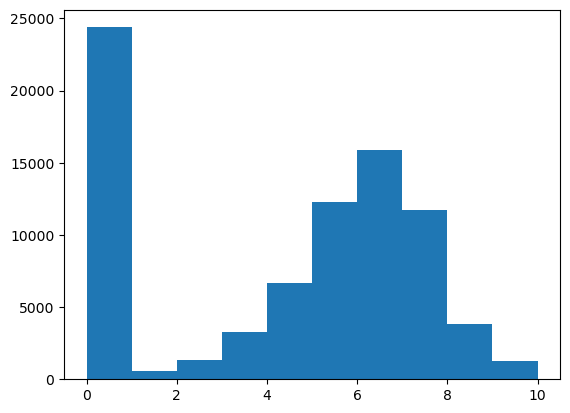

In [10]:
plt.hist(games["average_rating"])
plt.show()

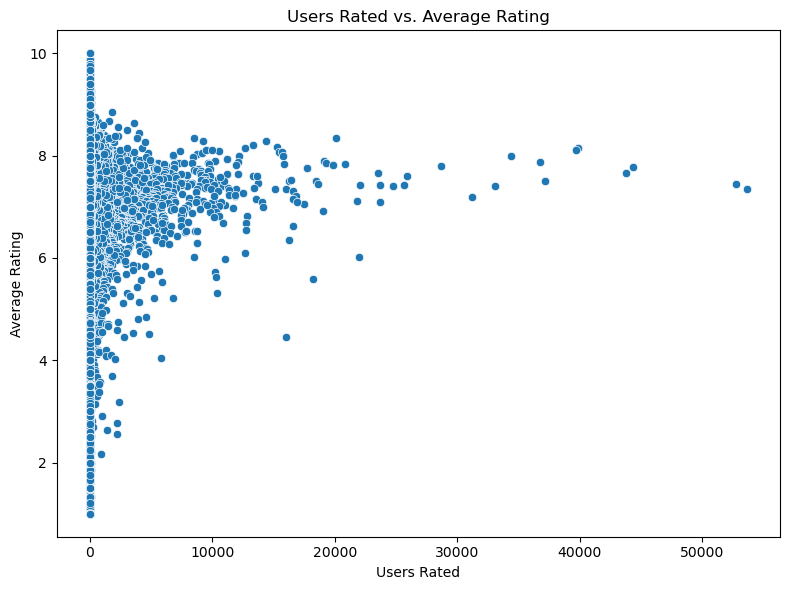

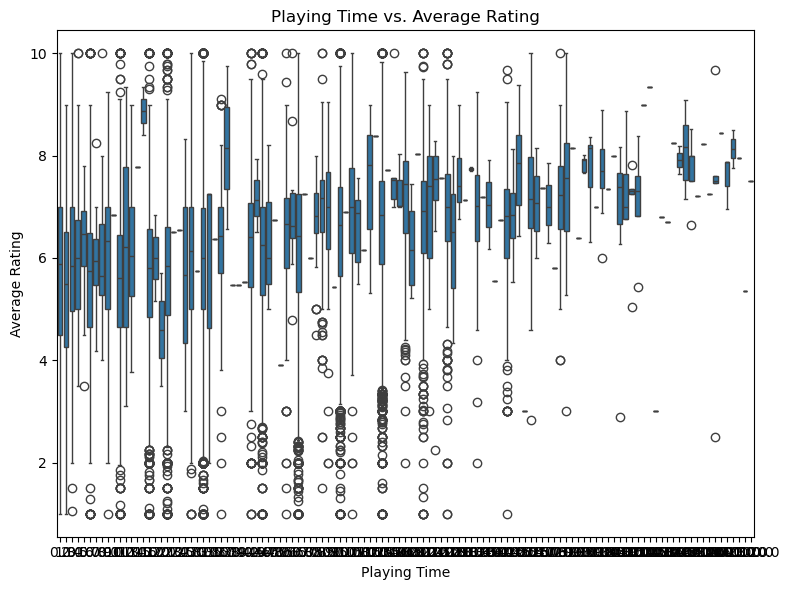

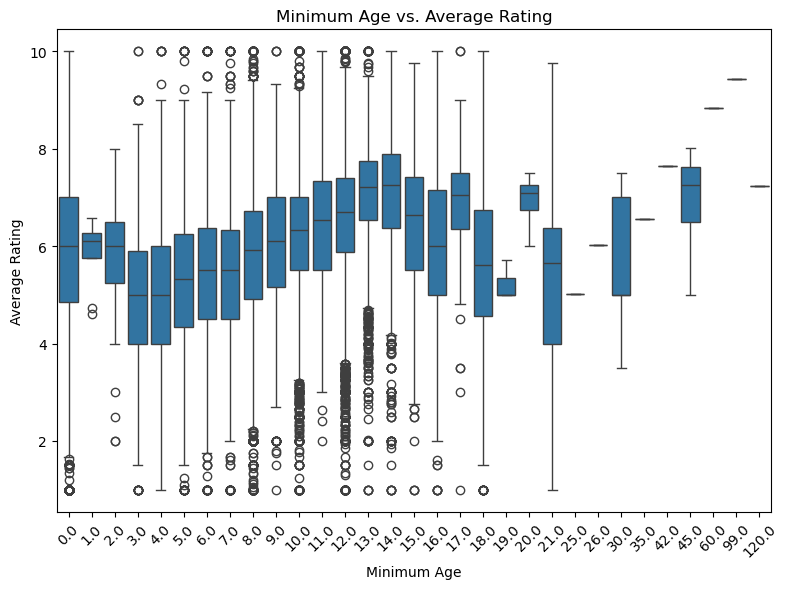

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'games' is your DataFrame containing the data

# 1. Users Rated vs. Average Rating
plt.figure(figsize=(8, 6))  # Adjust figure size for better spacing
sns.scatterplot(x='users_rated', y='average_rating', data=games)
plt.title("Users Rated vs. Average Rating")
plt.xlabel("Users Rated")  # Add x-axis label for clarity
plt.ylabel("Average Rating")  # Add y-axis label for clarity
plt.tight_layout()  # Prevent labels from overlapping
plt.show()

# 2. Boxplot of Play Time vs. Rating
plt.figure(figsize=(8, 6))
sns.boxplot(x='playingtime', y='average_rating', data=games)
plt.title("Playing Time vs. Average Rating")
plt.xlabel("Playing Time")  # Add x-axis label
plt.ylabel("Average Rating")  # Add y-axis label
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# 3. Min Age vs. Average Rating
plt.figure(figsize=(8, 6))
sns.boxplot(x='minage', y='average_rating', data=games)
plt.title("Minimum Age vs. Average Rating")
plt.xlabel("Minimum Age") # Add x-axis label
plt.ylabel("Average Rating") # Add y-axis label
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [12]:
# Print the first row of all the games with zero scores
print(games[games["average_rating"] == 0].iloc[0])

# Print the first row of games with scores greater than 0
print(games[games["average_rating"] > 0].iloc[0])

id                             318
type                     boardgame
name                    Looney Leo
yearpublished                  0.0
minplayers                     0.0
maxplayers                     0.0
playingtime                    0.0
minplaytime                    0.0
maxplaytime                    0.0
minage                         0.0
users_rated                      0
average_rating                 0.0
bayes_average_rating           0.0
total_owners                     0
total_traders                    0
total_wanters                    0
total_wishers                    1
total_comments                   0
total_weights                    0
average_weight                 0.0
Name: 13048, dtype: object
id                                  12333
type                            boardgame
name                    Twilight Struggle
yearpublished                      2005.0
minplayers                            2.0
maxplayers                            2.0
playingtime          

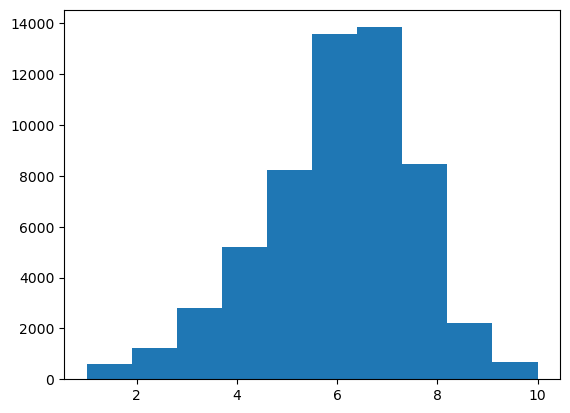

In [13]:
# removed any rows without user reviews
games = games[games["users_rated"] > 0]
# remove any row with missing values
games = games.dropna(axis = 0)

# make the histogram of all average rating
plt.hist(games["average_rating"])
plt.show()

In [14]:
print(games.columns)

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')


In [15]:
# since id column doesn't tell us any aything

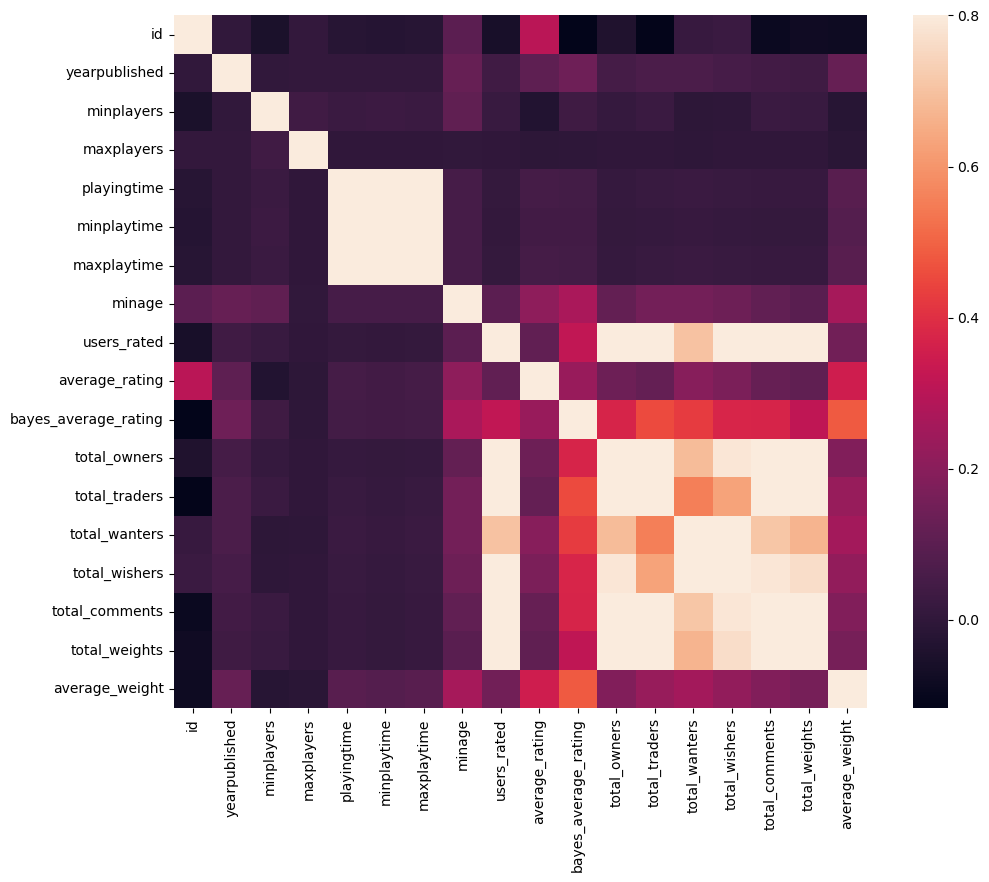

In [16]:
# Correlation matrix with only numeric columns,  a heat map showing difrrent parameters 
numeric_games = games.select_dtypes(include=['number'])  # Only keep numeric columns
corrmat = numeric_games.corr()

fig = plt.figure(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()




# Dataset Preprocessing

In [19]:
# Extract column names from the dataset
all_features = list(games.columns)

# list of columns to exclude from modeling
excluded_features = ["bayes_average_rating", "average_rating", "type", "name", "id"]

# only the features relevant for prediction
selected_features = [feature for feature in all_features if feature not in excluded_features]

# the target variable for prediction
target_variable = "average_rating"


In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error

# Define selected features and target
selected_features = ['users_rated', 'playingtime', 'minplayers', 'maxplayers', 'minage']
target_variable = 'average_rating'

# Impute missing values with mean
imputer = SimpleImputer(strategy='mean')

# Impute and separate features and target
X_train = imputer.fit_transform(train[selected_features])
y_train = train[target_variable].values

X_test = imputer.transform(test[selected_features])
y_test = test[target_variable].values

# Train and evaluate the model
LR = LinearRegression()
LR.fit(X_train, y_train)
predictions = LR.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print("Linear Regression MSE:", mse)

Linear Regression MSE: 2.359630035801377


In [27]:
# training and test datasets
from sklearn.model_selection import train_test_split

# training set
train = games.sample(frac=0.8, random_state = 1)

# Select anything not in the training set and put it in test
test = games.loc[~games.index.isin(train.index)]

# shapes
print(train.shape)
print(test.shape)

(45515, 20)
(11379, 20)


In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initialize the model
LR = LinearRegression()

# Fit the model to the training data
LR.fit(train[selected_features], train[target_variable])

LinearRegression()

In [25]:
from sklearn.metrics import r2_score

# Linear Regression R² Score
lr_r2 = r2_score(test[target_variable], predictions)
print("Linear Regression R² Score:", lr_r2)

Linear Regression R² Score: 0.05351664560298108


In [24]:
# Generate predictions for the test set
predictions = LR.predict(test[selected_features])

# Compute error between our test predictions and actual values
mean_squared_error(predictions, test[target_variable])

2.359630035801377

In [29]:
# Import the random forest model
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
RFR = RandomForestRegressor(n_estimators=100, min_samples_leaf=10, random_state=1)

# Fit to the data
RFR.fit(train[selected_features], train[target_variable])

RandomForestRegressor(min_samples_leaf=10, random_state=1)

In [30]:
# Predictions
rf_preds = RFR.predict(test[selected_features])
rf_mse = mean_squared_error(test[target_variable], rf_preds)
rf_r2 = r2_score(test[target_variable], rf_preds)

print("Random Forest MSE:", rf_mse)
print("Random Forest R² Score:", rf_r2)

Random Forest MSE: 1.9567097621422465
Random Forest R² Score: 0.21513407137792562


In [31]:
# Make predictions
predictions = RFR.predict(test[selected_features])

# Compute the error between our test predictions and actual values
mean_squared_error(predictions, test[target_variable])


1.9567097621422465

In [32]:
test[selected_features].iloc[0]


users_rated    15709.0
playingtime      200.0
minplayers         2.0
maxplayers         6.0
minage            14.0
Name: 9, dtype: float64

In [33]:
rating_LR = LR.predict(test[selected_features].iloc[0].values.reshape(1, -1))
rating_RFR = RFR.predict(test[selected_features].iloc[0].values.reshape(1, -1))
print(rating_LR)
print(rating_RFR)

[8.22435605]
[7.86179068]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [34]:
target = 'average_rating' 
print(test[target].iloc[0])

8.07933
